# Using californial housting train dataset
# Try to export as attached images with a notenbook in whatsapp group

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [64]:
df = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [65]:
df.shape

(17000, 9)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [67]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [68]:
# Solution 6.3
def correlation_coefficient(x, y):
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum([xi * yi for xi, yi in zip(x, y)])
    sum_x2 = sum([xi ** 2 for xi in x])
    sum_y2 = sum([yi ** 2 for yi in y])

    numerator = (n * sum_xy) - (sum_x * sum_y)
    denominator = ((n * sum_x2 - (sum_x ** 2)) * (n * sum_y2 - (sum_y ** 2))) ** 0.5

    r = numerator / denominator
    return r
def relation_summary(r_value):
  if abs(r_value) < 0.3:
    relation = "None or very weak"
  elif 0.3 <= abs(r_value) < 0.5:
    relation = "Weak"
  elif 0.5 <= abs(r_value) < 0.7:
    relation = "Moderate"
  else:
    relation = "Strong"
  if r_value > 0:
    return "Positive correlation//"+relation
  else:
    return "Negative correlation//"+relation

#Q1
Using correlation coefficient function that we used in Pandas assignement 😪,
to calculate corr for the follwoing columns


1.   housing_median_age and median_house_value
2.   total_rooms and total_bedrooms
3.   population and median_house_value
4.   median_income and median_house_value

🛑 **Select just 100 point from each columns**

Then, in one figure visualize the relationship between the last columns and let the correlation coefficient value for each chart in axis title

When you finished **export** the figure as fig_1.png

note to save figure before plt.show() 😸

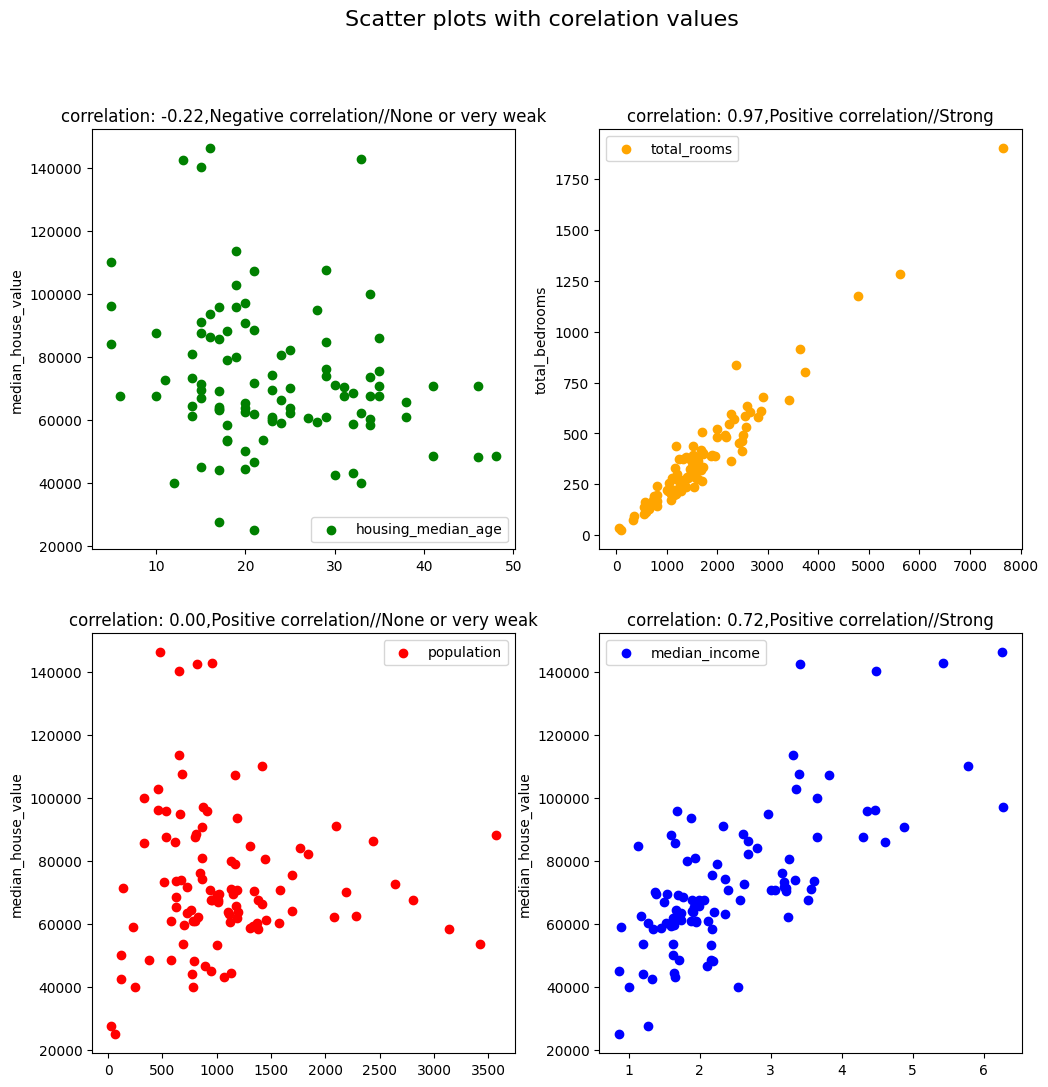

In [69]:
#Select first 100 points from each column (x and y pairs)
x1=df['housing_median_age'][:100]
y1=df['median_house_value'][:100]
x2=df['total_rooms'][:100]
y2=df['total_bedrooms'][:100]
x3=df['population'][:100]
y3=df['median_house_value'][:100]
x4=df['median_income'][:100]
y4=df['median_house_value'][:100]
#Calculate correlation coefficient for each pair using our custom function
r1=correlation_coefficient(x1,y1)
r2=correlation_coefficient(x2,y2)
r3=correlation_coefficient(x3,y3)
r4=correlation_coefficient(x4,y4)
#Create a 2x2 figure for subplots
fig,axs=plt.subplots(2,2,figsize=(12,12))
fig.suptitle('Scatter plots with corelation values', fontsize=16)

#First subplot: Housing Median Age vs Median House Value
axs[0,0].scatter(x1,y1,color='green',label='housing_median_age')
axs[0,0].set_title(f'correlation: {r1:.2f},{relation_summary(r1)}')
axs[0,0].set_ylabel('median_house_value')
axs[0,0].legend()
#Second subplot: Total Rooms vs Total Bedrooms
axs[0,1].scatter(x2,y2,color='orange',label='total_rooms')
axs[0,1].set_title(f'correlation: {r2:.2f},{relation_summary(r2)}')
axs[0,1].set_ylabel('total_bedrooms')
axs[0,1].legend()
#Third subplot: Population vs Median House Value
axs[1,0].scatter(x3,y3,color='red',label='population')
axs[1,0].set_title(f'correlation: {r3:.2f},{relation_summary(r3)}')
axs[1,0].set_ylabel('median_house_value')
axs[1,0].legend()
#Fourth subplot: Median Income vs Median House Value
axs[1,1].scatter(x4,y4,color='blue',label='median_income')
axs[1,1].set_title(f'correlation: {r4:.2f},{relation_summary(r4)}')
axs[1,1].set_ylabel('median_house_value')
axs[1,1].legend()
#Save the figure before showing it
plt.savefig('fig_1.png')
plt.show()

#Q2

Calculate the correlation coefficient between the following columns


1.    housing_median_age
2.    total_rooms
3.    total_bedrooms
4.    households
5.    median_income
6.    median_house_value


🛑 with each other and save it in 6X6 list and visualize it in heatmap

export the figure as fig_2.png

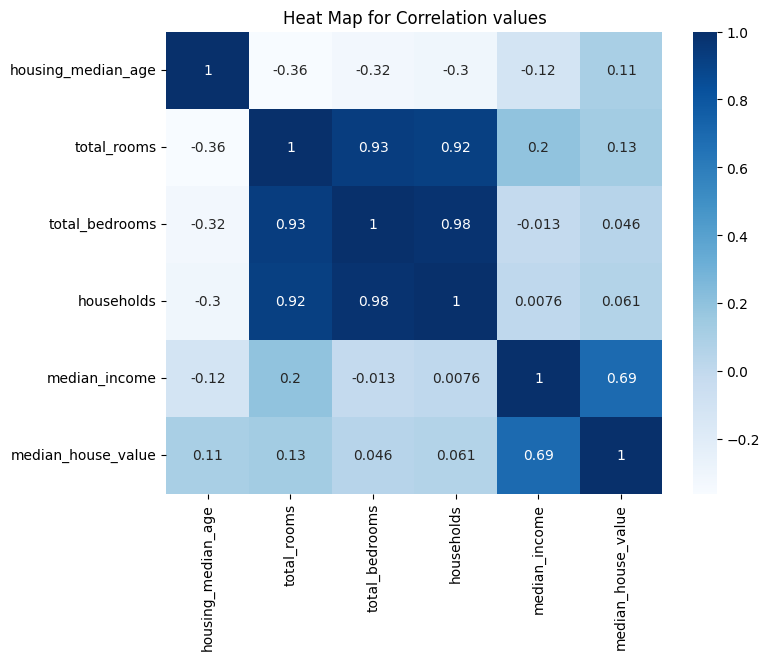

In [70]:
#Select the 6 columns
cols = ['housing_median_age',
        'total_rooms',
        'total_bedrooms',
        'households',
        'median_income',
        'median_house_value']

#Create empty 6x6 list to store correlation values
corr_matrix = []

#Calculate correlation manually
for i in cols:
    row = []
    for j in cols:
        row.append(correlation_coefficient(df[i].values, df[j].values))
    corr_matrix.append(row)

#Convert to numpy array for heatmap
corr_matrix = np.array(corr_matrix)

#Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues',
            xticklabels=cols, yticklabels=cols)
plt.title('Heat Map for Correlation values')

plt.savefig('fig_2.png')
plt.show()
